original


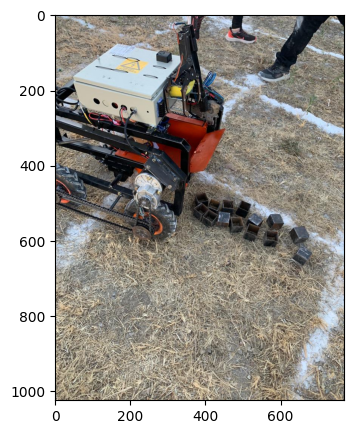

In [166]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("mine.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

yuv=cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

y_channel = yuv[:,:,0]


brightness = y_channel.mean()

base_image = np.copy(image)
print("original")
plt.figure(figsize=(5,5))
plt.imshow(base_image)


norm_image=np.copy(image)

/tmp/ipykernel_5016/1088884870.py:9: RuntimeWarning: divide by zero encountered in log
  f2= 20*np.log(np.abs(fshift_mask))


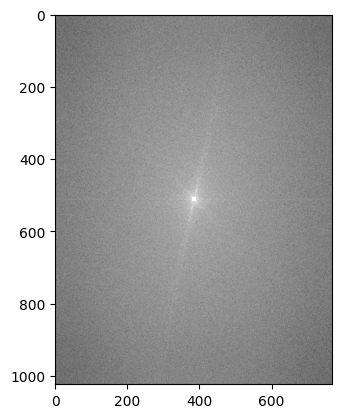

In [167]:
f = np.fft.fft2 (y_channel)
fshift_mask =np.fft.fftshift (f)

rows, cols=y_channel.shape
crow, ccol =rows//2 , cols//2
fshift_mask[crow-2:crow+3, ccol-2:ccol+3] = 0
f_ishift = np.fft.ifftshift(fshift_mask)

f2= 20*np.log(np.abs(fshift_mask))
plt.imshow(f2,cmap="gray") 


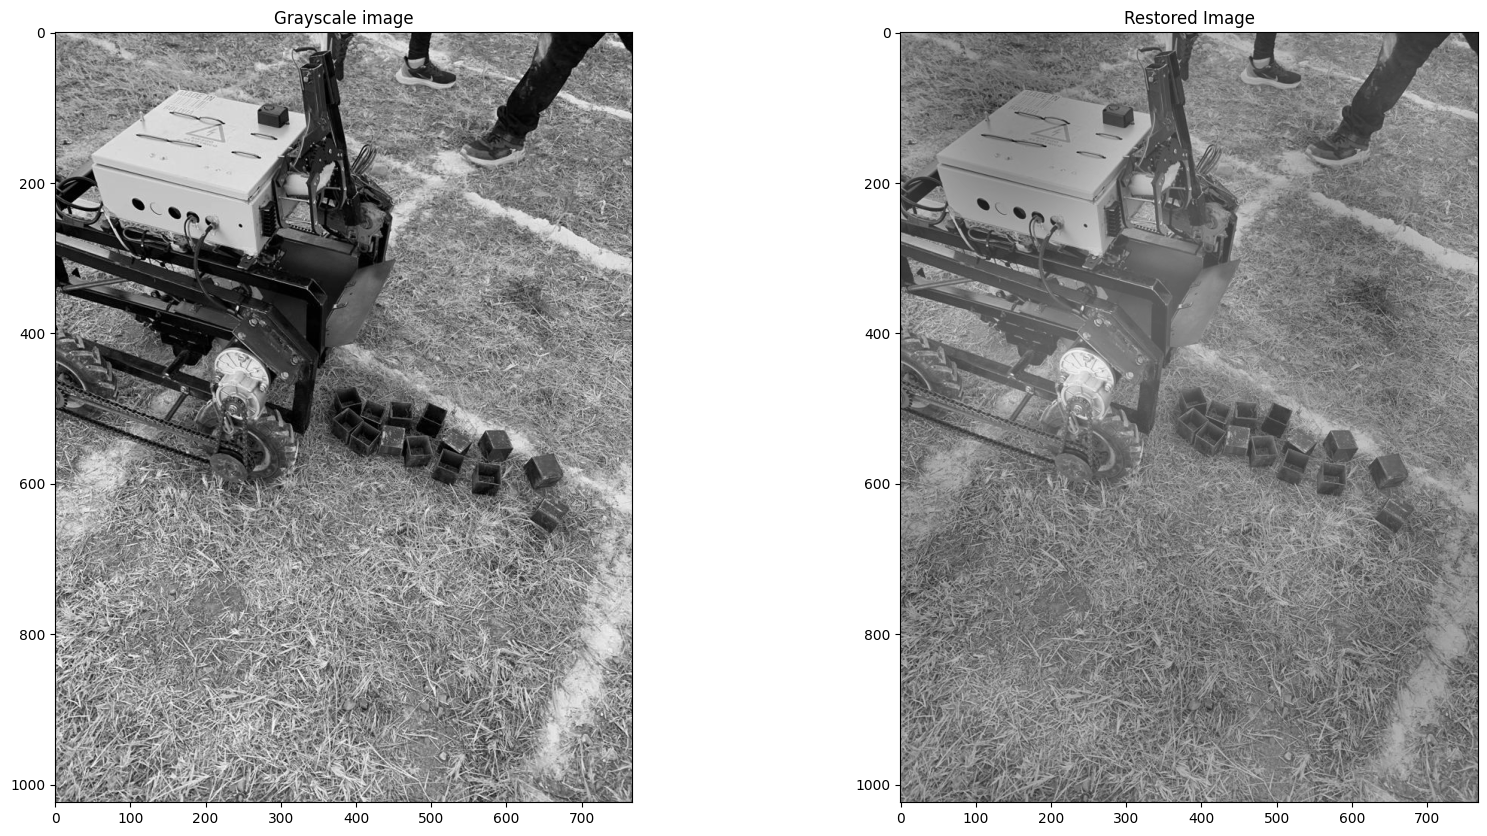

In [168]:

img_back=np.fft.ifft2(f_ishift)

img_back= np.real (img_back)


f, (ax1, ax2)= plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(gray, cmap='gray') 
ax1.set_title('Grayscale image') 
ax2.imshow (img_back, cmap='gray')
ax2.set_title("Restored Image")

plt.show()

(1024, 768)


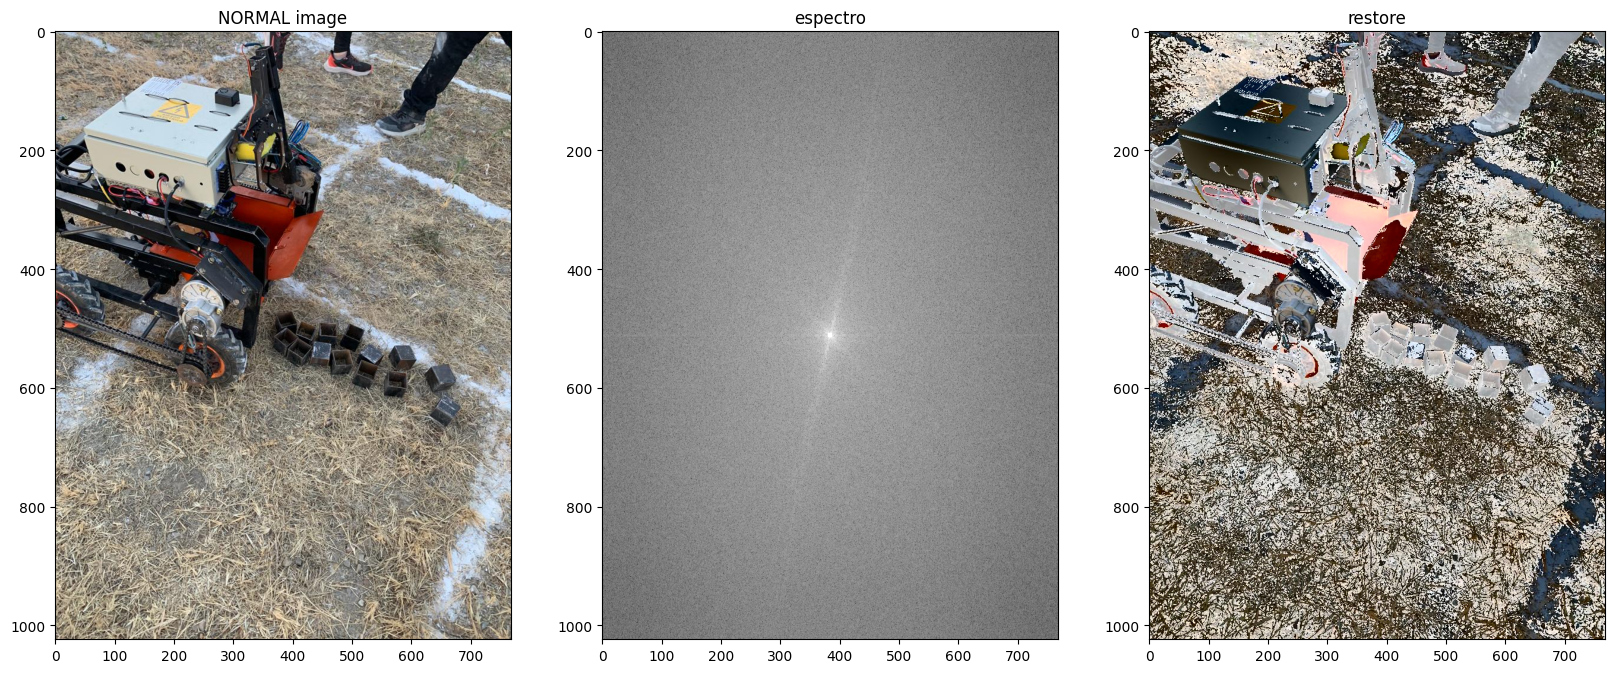

In [169]:
print(img_back.shape)


y_channel2 = yuv[:,:,0]
yuv[:,:,0]=img_back
img_backRGB=cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
f, (ax1, ax2,ax3)= plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(base_image) 
ax1.set_title('NORMAL image') 
ax2.imshow (f2, cmap='gray')
ax2.set_title("espectro")
ax3.imshow (img_backRGB)
ax3.set_title("restore")

plt.show()